Modify the KNN scratch code in our lecture such that:
- If the majority class of the first place is equal to the second place, then ask the algorithm to pick the next nearest neighbors as the decider
- Modify the code so it outputs the probability of the decision, where the probability is simply the class probability based on all the nearest neighbors
- Write a function which allows the program to receive a range of k, and output the cross validation score.  Last, it shall inform us which k is the best to use from a predefined range
- Put everything into a class <code>KNN(k=3)</code>.  It should have at least one method, <code>predict(X_train, X_test, y_train)</code>

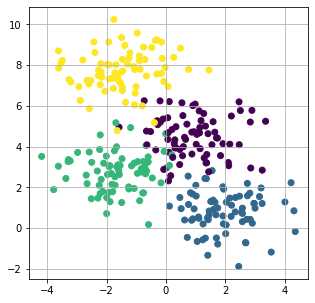

In [1]:
import matplotlib.pyplot as plt
import numpy as np
#let's consider the following 2D data with 4 classes
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import average_precision_score, classification_report
from sklearn.preprocessing import label_binarize

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

xfit = np.linspace(-1, 3.5)

figure = plt.figure(figsize=(5, 5))
ax = plt.axes()  #get the instance of axes from plt

ax.grid()
ax.scatter(X[:, 0], X[:, 1], c=y)

#where should this value be classified as?
#ax.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

#let's say roughly 5 neighbors
#circle = plt.Circle((0.6, 2.1), 0.5, color='red', fill=False)
#ax.add_artist(circle)

#standardize
scaler = StandardScaler()
X = scaler.fit_transform(X)

#do train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [2]:
class KNN:
    def __init__(self, k=3):
        self.k = k
        
    def find_distance(self, X_train, X_test,k):
    #create newaxis simply so that broadcast to all values
        dist = X_test[:, np.newaxis, :] - X_train[np.newaxis, :, :]
        sq_dist = dist ** 2

        #sum across feature dimension, thus axis = 2
        summed_dist = sq_dist.sum(axis=2)
        sq_dist = np.sqrt(summed_dist)
        return sq_dist
    
    def find_neighbors(self, X_train, X_test, k):
        dist = self.find_distance(X_train, X_test, k)
        #return the first k neighbors
        neighbors_ix = np.argsort(dist)[:, 0:self.k]
        return neighbors_ix
    
    def get_most_common(self, y):
        return np.bincount(y).argmax()
    
    def cv(self, X_train, y_train, cv, k):
        foldsize = int(X_train.shape[0]/cv)
        yhat_cv = np.zeros((len(k), cv))
        yhat_cv_prob = np.zeros((len(k), cv))
        
        for k_idx, kneighbors in enumerate(k):
            self.k = kneighbors
            for fold_idx, i in enumerate(range(0, X_train.shape[0], foldsize)):
                X_test_ = X_train[i:i+foldsize]
                y_test_ = y_train[i:i+foldsize]
                X_train_ = np.concatenate((X_train[:i], X_train[i+foldsize:]))
                y_train_ = np.concatenate((y_train[:i], y_train[i+foldsize:]))
                yhat, yhat_prob = self.predict(X_train_, X_test_,y_train_,k=3)
                accuracy = np.sum(yhat == y_test_)/len(y_test_)
                yhat_cv[k_idx, fold_idx] = accuracy
                yhat_cv_prob[k_idx, fold_idx] = yhat_prob.mean()
        return yhat_cv, yhat_cv_prob
    
    def predict(self, X_train, X_test, y_train, k):
        neighbors_ix = self.find_neighbors(X_train, X_test,k)
        pred = np.zeros(X_test.shape[0])
        for ix, y in enumerate(y_train[neighbors_ix]):
            pred[ix] = self.get_most_common(y)
        return pred

In [4]:
model = KNN(k=3)

yhat = np.zeros(X_test.shape[0])
yaht = model.predict(X_train, X_test, y_train, k=3)
n_classes = len(np.unique(y_test))

print("Accuracy: ", np.sum(yhat == y_test)/len(y_test))

print("=========Average precision score=======")
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])
yhat_binarized = label_binarize(yhat, classes=[0, 1, 2, 3])

for i in range(n_classes):
    class_score = average_precision_score(y_test_binarized[:, i], yhat_binarized[:, i])
    print(f"Class {i} score: ", class_score)
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))
    

Accuracy:  0.3333333333333333
=========Average precision score=======
Class 0 score:  0.3333333333333333
Class 1 score:  0.2
Class 2 score:  0.24444444444444444
Class 3 score:  0.2222222222222222
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.33      1.00      0.50        30
           1       0.00      0.00      0.00        18
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00        20

    accuracy                           0.33        90
   macro avg       0.08      0.25      0.12        90
weighted avg       0.11      0.33      0.17        90

=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.33      1.00      0.50        30
           1       0.00      0.00      0.00        18
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00        20

   

C:\Users\damia\pythonDSAI\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\damia\pythonDSAI\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\damia\pythonDSAI\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\damia\pythonDSAI\lib\site-packages\sklearn\

In [5]:
model = KNN()

#check cv
k = np.arange(2, 11)
cv_score, prob_score = model.cv(X_train, y_train, 10,k)
cv_score = cv_score.mean(axis=1)
prob_score = prob_score.mean(axis=1)
for k_idx, kneighbors in enumerate(k):
    print(f"Score with k={kneighbors}: ", cv_score[k_idx], "and prob_score of ", prob_score[k_idx])

#choose model with highest score
model = KNN(k=3)
yhat, yhat_prob = model.predict(X_train, X_test, y_train)

print("=========Accuracy=======")
print("Accuracy: ", np.sum(yhat == y_test)/len(y_test))
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))
print("=========Probability score=======")
print("Probability: ", yhat_prob.mean())




ValueError: too many values to unpack (expected 2)